# CLASSIFY DATA

Classify data for machine learning algorithm training.

In [1]:
%matplotlib inline

# Reading files
import h5py
import toml

# Scientific computing
import numpy as np
import pandas as pd

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#sns.set_context('paper')

# Other
import os
import subprocess
from random import choice
import time as pytime
from IPython.display import display, clear_output

# Suppress NaturalNameWarning raised by HDFStore
import warnings
import tables
warnings.filterwarnings('ignore', category=tables.NaturalNameWarning)

## Preparation
Create folders `ris` and `ris/plots` and initialize classification parameters.

In [2]:
# Create 'ris' folder
if not os.path.exists('ris'):
    os.makedirs('ris')
# Create 'plot' folder
if not os.path.exists('ris/plots'):
    os.makedirs('ris/plots')
    
# Parameters
INTERVAL_LENGTH = 100
OPERATING_DAY_LIST = ['091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105']
DETECTOR_LIST = ['143-5', '143-6', '143-7']

## Classification

### Define the classification function

In [3]:
def classify():
    
    # Load parameters and status from a toml file
    STATUS = toml.load('status.toml')
    
    print('ACTUAL STATUS:\n', STATUS)

    # Choose random operating day and detector
    OD = choice(OPERATING_DAY_LIST)
    DET = choice(DETECTOR_LIST)
    CHOICE = '/' + OD + '/' + DET

    if len(data[CHOICE].index.values) % 2 == 0:
        limit_interval = 1.1 * np.median(data[CHOICE].index.values[1::2] - data[CHOICE].index.values[::2])
    else:
        limit_interval = 1.1 * np.median(data[CHOICE].index.values[1::2] - data[CHOICE].index.values[:-1:2])

    # Choose a random starting point. If the difference in time is too big, it means I'm taking the data over a 'hole'.
    print('\nEXTRACTING DATA FROM: OPERATING DAY ' + OD + ' - DETECTOR ' + DET)
    print('Searching interval...')
    i = 1
    print('Attempt:', i, '\r', end='')
    begin = int((len(data[CHOICE].index.values) - 200) * np.random.random())
    end = begin + INTERVAL_LENGTH
    while((data[CHOICE].index.values[end] - data[CHOICE].index.values[begin]) > INTERVAL_LENGTH * limit_interval):
        i += 1
        print('Attempt:', i, '\r', end='')
        begin = int((len(data[CHOICE].index.values) - 200) * np.random.random())
        end = begin + INTERVAL_LENGTH
    print('\n')

    # Plot
    plt.plot(data[CHOICE].iloc[begin:end], marker='.', linestyle='dashed')
    plt.show()
    plt.close()

    # Classify
    print('\nStep:', STATUS['N'])
    print('Choice: [ yes (y) | no (n) | multi (m) | beautiful glitch (yb) | beautiful no-glitch (nb) | beautiful multi (mb) ]')
    print('Type "exit" to interrupt.')
    answer = input('Do you see a glitch?')
    
    # Create DataFrame
    if answer in ['y', 'yb', 'n', 'nb', 'm', 'mb']:
        df = pd.DataFrame({'data': data[CHOICE]['data_cleaned'].iloc[begin:end]}, index=data[CHOICE].iloc[begin:end].index.values)
        df.index.name = 'time'

    # GLITCH
    # Normal
    if answer == 'y':
        print('Glitch detected.')
        # Update status
        STATUS['N_GLITCH'] += 1
        STATUS['N'] += 1
        # Save data
        dataname = 'GLITCH/' + str(STATUS['N_GLITCH'])
        with pd.HDFStore('ris/OUT-classified.h5') as out_file:
            out_file.put(dataname, df)
        with h5py.File('ris/OUT-classified.h5') as out_file:
            out_file[dataname].attrs['TITLE'] = np.string_('From: ' + CHOICE)
            out_file[dataname].attrs['VERSION'] = np.string_('Date: ' + pytime.asctime() + ' | Script name: classification.ipynb | Script commit ID: ' + subprocess.run(['git', 'log', '-1', '--format=%H', 'classification.ipynb'], stdout=subprocess.PIPE).stdout.decode('ASCII').rstrip())   
    # Beautiful
    elif answer == 'yb':
        print('Glitch detected; saved.')
        # Update status
        STATUS['N_GLITCH'] += 1
        STATUS['N'] += 1
        # Save data
        dataname = 'GLITCH/' + str(STATUS['N_GLITCH'])
        with pd.HDFStore('ris/OUT-classified.h5') as out_file:
            out_file.put(dataname, df)
        with h5py.File('ris/OUT-classified.h5') as out_file:
            out_file[dataname].attrs['TITLE'] = np.string_('From: ' + CHOICE)
            out_file[dataname].attrs['VERSION'] = np.string_('Date: ' + pytime.asctime() + ' | Script name: classification.ipynb | Script commit ID: ' + subprocess.run(['git', 'log', '-1', '--format=%H', 'classification.ipynb'], stdout=subprocess.PIPE).stdout.decode('ASCII').rstrip())   
        # Save plot
        plt.plot(data[CHOICE].iloc[begin:end], marker='.', linestyle='dashed')
        plt.title('Glitch ' + str(STATUS['N_GLITCH']))
        plt.xlabel('Time [s]')
        plt.ylabel('Signal [T_cmb V / W]')
        plt.savefig('ris/plots/glitch-' + str(STATUS['N_GLITCH']) + '.png', dpi=600)
        plt.close()

    # NO GLITCH
    # Normal
    elif answer == 'n':
        print('No glitch detected.')
        # Update status
        STATUS['N_NO_GLITCH'] += 1
        STATUS['N'] += 1
        # Save data
        dataname = 'NO_GLITCH/' + str(STATUS['N_NO_GLITCH'])
        with pd.HDFStore('ris/OUT-classified.h5') as out_file:
            out_file.put(dataname, df)
        with h5py.File('ris/OUT-classified.h5') as out_file:
            out_file[dataname].attrs['TITLE'] = np.string_('From: ' + CHOICE)
            out_file[dataname].attrs['VERSION'] = np.string_('Date: ' + pytime.asctime() + ' | Script name: classification.ipynb | Script commit ID: ' + subprocess.run(['git', 'log', '-1', '--format=%H', 'classification.ipynb'], stdout=subprocess.PIPE).stdout.decode('ASCII').rstrip())   
    # Beautiful
    elif answer == 'nb':
        print('No glitch detected; saved.')
        # Update status
        STATUS['N_NO_GLITCH'] += 1
        STATUS['N'] += 1
        # Save data
        dataname = 'NO_GLITCH/' + str(STATUS['N_NO_GLITCH'])
        with pd.HDFStore('ris/OUT-classified.h5') as out_file:
            out_file.put(dataname, df)
        with h5py.File('ris/OUT-classified.h5') as out_file:
            out_file[dataname].attrs['TITLE'] = np.string_('From: ' + CHOICE)
            out_file[dataname].attrs['VERSION'] = np.string_('Date: ' + pytime.asctime() + ' | Script name: classification.ipynb | Script commit ID: ' + subprocess.run(['git', 'log', '-1', '--format=%H', 'classification.ipynb'], stdout=subprocess.PIPE).stdout.decode('ASCII').rstrip())   
        # Save plot
        plt.plot(data[CHOICE].iloc[begin:end], marker='.', linestyle='dashed')
        plt.title('No glitch ' + str(STATUS['N_NO_GLITCH']))
        plt.xlabel('Time [s]')
        plt.ylabel('Signal [T_cmb V / W]')
        plt.savefig('ris/plots/no_glitch-' + str(STATUS['N_NO_GLITCH']) + '.png', dpi=600)
        plt.close()

    # MULTI GLITCH
    # Normal
    elif answer == 'm':
        print('Multi glitch detected.')
        # Update status
        STATUS['N_MULTI'] += 1
        STATUS['N'] += 1
        # Save data
        dataname = 'MULTI_GLITCH/' + str(STATUS['N_MULTI'])
        with pd.HDFStore('ris/OUT-classified.h5') as out_file:
            out_file.put(dataname, df)
        with h5py.File('ris/OUT-classified.h5') as out_file:
            out_file[dataname].attrs['TITLE'] = np.string_('From: ' + CHOICE)
            out_file[dataname].attrs['VERSION'] = np.string_('Date: ' + pytime.asctime() + ' | Script name: classification.ipynb | Script commit ID: ' + subprocess.run(['git', 'log', '-1', '--format=%H', 'classification.ipynb'], stdout=subprocess.PIPE).stdout.decode('ASCII').rstrip())   
    # Beautiful
    elif answer == 'mb':
        print('Multi glitch detected; saved.')
        # Update status
        STATUS['N_MULTI'] += 1
        STATUS['N'] += 1
        # Save data
        dataname = 'MULTI_GLITCH/' + str(STATUS['N_MULTI'])
        with pd.HDFStore('ris/OUT-classified.h5') as out_file:
            out_file.put(dataname, df)
        with h5py.File('ris/OUT-classified.h5') as out_file:
            out_file[dataname].attrs['TITLE'] = np.string_('From: ' + CHOICE)
            out_file[dataname].attrs['VERSION'] = np.string_('Date: ' + pytime.asctime() + ' | Script name: classification.ipynb | Script commit ID: ' + subprocess.run(['git', 'log', '-1', '--format=%H', 'classification.ipynb'], stdout=subprocess.PIPE).stdout.decode('ASCII').rstrip())   
        # Save plot
        plt.plot(data[CHOICE].iloc[begin:end], marker='.', linestyle='dashed')
        plt.title('Multi glitch ' + str(STATUS['N_MULTI']))
        plt.xlabel('Time [s]')
        plt.ylabel('Signal [T_cmb V / W]')
        plt.savefig('ris/plots/multi_glitch-' + str(STATUS['N_MULTI']) + '.png', dpi=600)
        plt.close()

    elif answer == 'exit':
        return answer
    
    else:
        print('Unable to classify.')

    # Save parameters
    with open('status.toml', mode='w') as toml_status_file:
        toml.dump(STATUS, toml_status_file)
    
    # Clear output
    clear_output(wait=True)

### Classify

Now run this function how many times you want.

ACTUAL STATUS:
 {'N': 798, 'N_GLITCH': 255, 'N_MULTI': 99, 'N_NO_GLITCH': 444}

EXTRACTING DATA FROM: OPERATING DAY 099 - DETECTOR 143-7
Searching interval...
Attempt: 1 



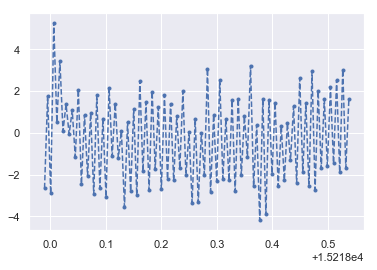


Step: 798
Choice: [ yes (y) | no (n) | multi (m) | beautiful glitch (yb) | beautiful no-glitch (nb) | beautiful multi (mb) ]
Type "exit" to interrupt.


Do you see a glitch? exit


In [4]:
# Open cleaned data file
data = pd.HDFStore('../cleaning/ris/OUT-cleaned.h5', mode='r')

# Classify
while classify() != 'exit':
    pass

# Close data file
data.close()

## Utility

### Print classified data

### Plot graphs
Plot classified data and check if there are errors or no.

### Reset the classification
Reset the classification by removing `OUT-classified.h5` file and `plot` folder. **REMEMBER TO MOVE INTERESTING PLOTS INTO THE `ris` FOLDER!**